<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Klasifikasi%20Ikan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image_size = (32, 32)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/FishImgDataset/train',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    'drive/MyDrive/FishImgDataset/val',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'drive/MyDrive/FishImgDataset/test',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Mounted at /content/drive
Found 6328 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 34 images belonging to 31 classes.


In [ ]:
# Menyimpan beberapa batch
num_batches = 32  # Jumlah batch yang ingin diambil
X_train = []
y_train = []

for _ in range(num_batches):
    X_batch, y_batch = next(train_generator)
    X_train.append(X_batch)
    y_train.append(y_batch)

# Menggabungkan data dari beberapa batch
X_train = np.vstack(X_train)
y_train = np.vstack(y_train)

# Mengecek bentuk
print(f"Shape X_train_all: {X_train.shape}")
print(f"Shape y_train_all: {y_train.shape}")

Shape X_train_all: (1024, 32, 32, 3)
Shape y_train_all: (1024, 31)


In [ ]:
num_batches = 32  # Jumlah batch yang ingin diambil
X_val = []
y_val = []

for _ in range(num_batches):
    X_batch, y_batch = next(train_generator)
    X_val.append(X_batch)
    y_val.append(y_batch)

# Menggabungkan data dari beberapa batch
X_val = np.vstack(X_val)
y_val = np.vstack(y_val)

# Mengecek bentuk
print(f"Shape X_train_all: {X_val.shape}")
print(f"Shape y_train_all: {y_val.shape}")

Shape X_train_all: (1024, 32, 32, 3)
Shape y_train_all: (1024, 31)


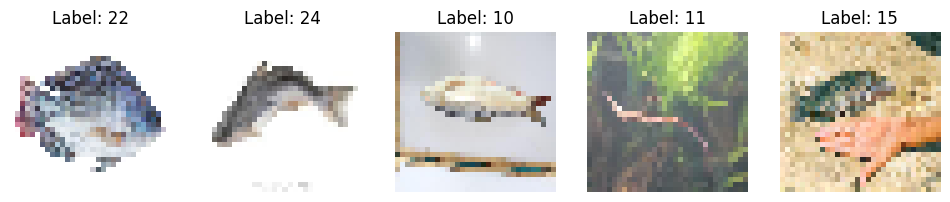

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    # Menampilkan gambar dari batch
    axes[i].imshow(X_train[i])  # x_batch berisi gambar
    axes[i].set_title(f"Label: {np.argmax(y_batch[i])}")  # y_batch berisi label dalam format one-hot, jadi kita ambil argmax
    axes[i].axis('off')  # Menyembunyikan sumbu

plt.show()

# CNN

In [ ]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile model

In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,911 (636.37 KB)

 Trainable params: 162,911 (636.37 KB)

 Non-trainable params: 0 (0.00 B)

callback

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_cnn.fit(
    train_generator,
    epochs=25,
    batch_size=64,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 1502s 8s/step - accuracy: 0.2037 - loss: 3.0934 - val_accuracy: 0.1977 - val_loss: 3.6457
Epoch 2/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 100s 505ms/step - accuracy: 0.2684 - loss: 2.6217 - val_accuracy: 0.2392 - val_loss: 3.6635
Epoch 3/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 94s 478ms/step - accuracy: 0.3224 - loss: 2.3328 - val_accuracy: 0.2883 - val_loss: 3.7622
Epoch 4/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 93s 470ms/step - accuracy: 0.3773 - loss: 2.1002 - val_accuracy: 0.3352 - val_loss: 3.6714


In [34]:
test_loss, test_accuracy = model_cnn.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 2.2559
Test Accuracy: 0.4118


In [38]:
import numpy as np

# Prediksi probabilitas
y_pred_probs = model_cnn.predict(test_generator, verbose=0)

# Ambil kelas prediksi (argmax)
y_pred = np.argmax(y_pred_probs, axis=1)

# Ambil label asli dari test_generator
y_test = test_generator.classes

# Tampilkan hasil prediksi dan label asli
print("Predicted classes:", y_pred[:10])
print("True classes     :", y_test[:10])


Predicted classes: [11 11 11 11 11 11 11 11 11 11]
True classes     : [ 8  9 11 11 11 11 11 11 11 11]


In [39]:
y_test[:10]

array([ 8,  9, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int32)

In [40]:

len(y_test)

34

In [41]:
from collections import Counter
Counter(y_test)

Counter({np.int32(8): 1,
         np.int32(9): 1,
         np.int32(11): 13,
         np.int32(13): 5,
         np.int32(15): 1,
         np.int32(17): 1,
         np.int32(21): 1,
         np.int32(26): 11})

In [42]:

Counter(y_pred)

Counter({np.int64(11): 33, np.int64(15): 1})

In [43]:
y_test = test_generator.classes  # label asli

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only

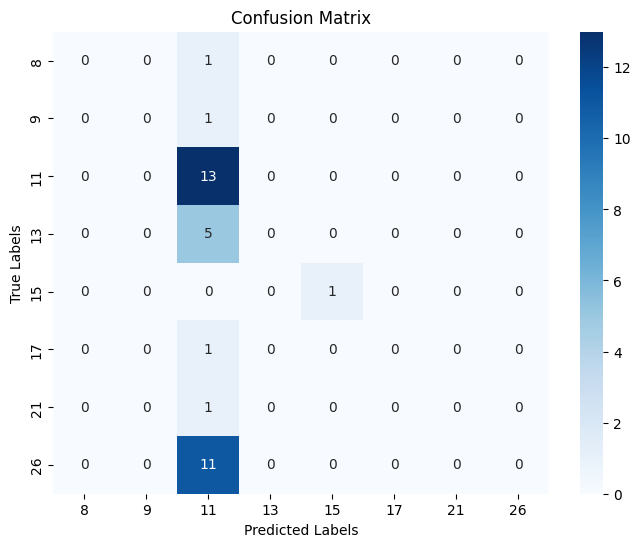


Accuracy: 0.4118
Precision: 0.1800
Recall: 0.4118
F1 Score: 0.2455
ROC AUC Score: nan


In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi y_test menjadi one-hot
y_test_onehot = label_binarize(y_test, classes=np.arange(y_pred_probs.shape[1]))

# Hitung semua metrik
cnn_acc = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')
cnn_roc_auc = roc_auc_score(y_test_onehot, y_pred_probs, multi_class='ovr')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cetak metrik
print(f"\nAccuracy: {cnn_acc:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print(f"F1 Score: {cnn_f1:.4f}")
print(f"ROC AUC Score: {cnn_roc_auc:.4f}")


Unique labels in y_test: [ 8  9 11 13 15 17 21 26]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ran

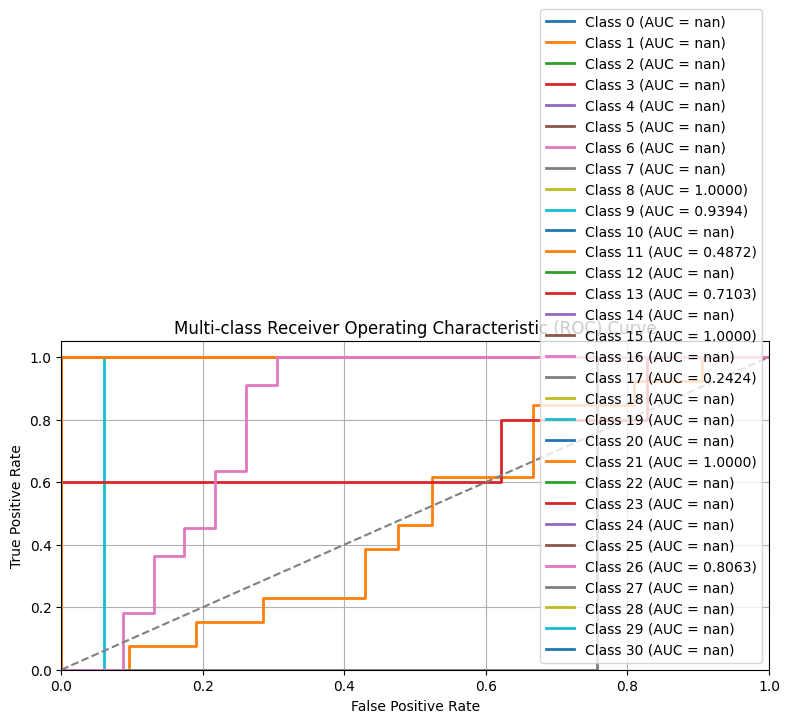

In [46]:
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek jumlah kelas
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi y_test ke One-vs-Rest (biner)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)  # Menghitung AUC untuk kelas ke-i
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Menambahkan garis referensi diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()